# Clustering and PCA

### Mushroom Dataset

Podeis obtener el conjunto de datos en el siguiente enlace:

[Mushroom Dataset](https://www.kaggle.com/uciml/mushroom-classification)

Como podréis comprobar, hay muchas variables, todas ellas categóricas, por lo que exploraciones con scatterplot no nos serán útiles como en otros casos.

La variable a predecir ``class`` es binaria.


In [139]:
# Carga de librerías, las que hemos considerado básicas, añadid lo que queráis :)

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

### Leer conjunto de datos y primer vistazo

In [140]:
# Leer el csv y sacar por pantalla las cinco primeras filas.
hongos = pd.read_csv("mushrooms.csv")
hongos.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Exploración de datos

In [141]:
# Descripción del conjunto de datos, estándard.
hongos.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


*Nombre del conjunto de datos*:Hongos

*Variables (o características)*: Este conjunto de datos contiene las siguientes caracteristicas. 

'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
'stalk-surface-below-ring', 'stalk-color-above-ring',
'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
'ring-type', 'spore-print-color', 'population', 'habitat'.

Caracterìsticas en Español:

 'clase', 'forma del sombrero', 'superficie del sombrero', 'color del sombrero', 'magulladuras', 'olor',
 'unión de las láminas', 'espaciado de las láminas', 'tamaño de las láminas', 'color de las láminas',
 'forma del tallo', 'raíz del tallo', 'superficie del tallo por encima del anillo',
 'superficie del tallo por debajo del anillo', 'color del tallo por encima del anillo',
 'color del tallo por debajo del anillo', 'tipo de velo', 'color del velo', 'número de anillos',
 'tipo de anillo', 'color de la esporada', 'población', 'hábitat'
 
*Tipo de dato*: caracterìsticas categoricas de los hongos.

*Descripción de las variables*

class:

Descripción: Indica la clase del hongo.

cap-shape (forma del sombrero):

Descripción: Describe la forma del sombrero del hongo (la parte superior).

cap-surface (superficie del sombrero):

Descripción: Describe la textura o tipo de superficie del sombrero del hongo.


cap-color (color del sombrero):

Descripción: Color del sombrero del hongo. 


bruises (magulladuras):

Descripción: Indica si el hongo muestra signos de magulladuras cuando se daña.

odor (olor):

Descripción: El olor del hongo.


gill-attachment (unión de las láminas):
Descripción: Cómo están unidas las láminas al tallo del hongo.


gill-spacing (espaciado de las láminas):
Descripción: Qué tan juntas o separadas están las láminas del hongo.


gill-size (tamaño de las láminas):
Descripción: Tamaño de las láminas.


gill-color (color de las láminas):
Descripción: Color de las láminas debajo del sombrero.


stalk-shape (forma del tallo):
Descripción: La forma del tallo del hongo.


stalk-root (raíz del tallo):
Descripción: La estructura o forma de la raíz del tallo.


stalk-surface-above-ring (superficie del tallo por encima del anillo):
Descripción: La textura de la superficie del tallo por encima del anillo.


stalk-surface-below-ring (superficie del tallo por debajo del anillo):
Descripción: Textura de la superficie del tallo debajo del anillo.


stalk-color-above-ring (color del tallo por encima del anillo):
Descripción: Color del tallo en la parte superior al anillo.


stalk-color-below-ring (color del tallo por debajo del anillo):
Descripción: Color del tallo en la parte inferior al anillo.


veil-type (tipo de velo):
Descripción: Tipo de velo del hongo, que cubre las láminas cuando el hongo es joven.


veil-color (color del velo):
Descripción: Color del velo.


ring-number (número de anillos):
Descripción: Cuántos anillos tiene el tallo del hongo.


ring-type (tipo de anillo):
Descripción: Describe el tipo de anillo presente en el tallo.


spore-print-color (color de la esporada):
Descripción: El color de la impresión de esporas del hongo (un factor importante en la identificación de hongos).


population (población):
Descripción: Describe la abundancia de hongos en un área determinada.


habitat (hábitat):
Descripción: El tipo de ambiente donde se encuentra el hongo.


*Número de instancias*: El conjunto de datos se compone de 23 columnas y 5 filas.

*Formato de los datos*: Los datos se importan en formato csv.

*Valores faltantes o nulos*: No se detectaron valores faltante o nulos.

*Distribución de los datos*: Estadísticas descriptivas como medias, medianas, moda, rangos, desviación estándar, etc.

*Fuente del conjunto de datos*: https://www.kaggle.com/datasets .


In [142]:
hongos.shape


(8124, 23)

In [143]:
hongos.columns


Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [144]:
# Información sobre el tipo de datos de cada feature.
hongos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Calcular el número de nulos de cada feature

In [145]:
# Igual que otras veces, una linea, contar los nulos por variable.
hongos.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Buscar valores extraños. Para ello, ver los valores únicos en cada feature

In [146]:
# Obtener un nuevo dataframe de dos columnas donde en la primera estén las features (features) y en la otra los valores únicos
# asociados (n_values).
nuevo_hongos = pd.DataFrame({
    'features': hongos.columns,
    'n_values': hongos.nunique().values,
    'unique_values': [list(hongos[col].unique()) for col in hongos.columns] 
})
nuevo_hongos

,features,n_values,unique_values
0,class,2,"[p, e]"
1,cap-shape,6,"[x, b, s, f, k, c]"
2,cap-surface,4,"[s, y, f, g]"
3,cap-color,10,"[n, y, w, g, e, p, b, u, c, r]"
4,bruises,2,"[t, f]"
5,odor,9,"[p, a, l, n, f, c, y, s, m]"
6,gill-attachment,2,"[f, a]"
7,gill-spacing,2,"[c, w]"
8,gill-size,2,"[n, b]"
9,gill-color,12,"[k, n, g, p, w, h, u, e, b, r, y, o]"


#### Tratar aquellos valores que entendamos que sean nulos


In [147]:
# Imputaciones. Podéis quitar esos puntos (fila entera), imputar con la moda o dejar ese valor como una posibilidad más.

#### Mirad cuántos valores hay en cada feature, ¿Todas las features aportan información? Si alguna no aporta información, eliminadla

In [148]:
# Dejar por el camino si procede.
#se elimina esta carcteristica proque solo la posee un hongo
hongos.drop(columns=['veil-type'],axis=1, inplace=True)


#### Separar entre variables predictoras y variables a predecir

In [149]:
#la variable que trata de predecir este conjunto de datos es 'class'.

y = hongos['class'].map({'e': 1, 'p': 0})
X = hongos.drop("class", axis = 1)


#### Codificar correctamente las variables categóricas a numéricas

In [150]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X)

#### Train test split

In [151]:
# Os lo dejamos a todos igual
X_encoded = encoder.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=42)

## PCA

Es un conjunto de datos del que aún no hemos visto nada (no tenemos graficas) así que vamos a hacer algunas. Tenemos el problema de que son muchas variables, **PCA al rescate**: le pedimos que nos de dos dimensiones y las pintamos, sabemos que serán **aquellas que retengan más información**.

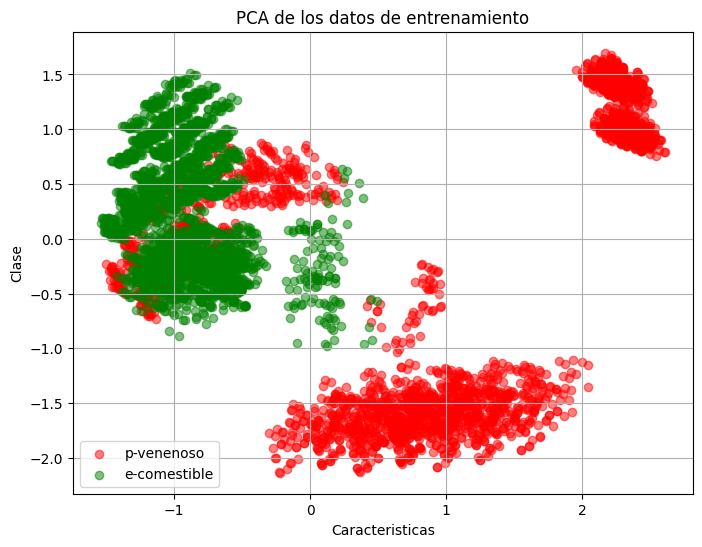

In [152]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
# Representar en un scatterplot y poner en color las etiquetas de entrenamiento
plt.figure(figsize=(8, 6))
colores = {0: 'red', 1: 'green'}
class_y = {0: 'p-venenoso', 1: 'e-comestible'} 
#Gràfico
for label in np.unique(y_train):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                label=class_y[label], color=colores[label], alpha=0.5)

plt.title('PCA de los datos de entrenamiento')
plt.xlabel('Caracteristicas')
plt.ylabel('Clase')
plt.legend()
plt.grid()
plt.show()

Parece que está bastante separadito, parece que a ojo mucho se puede ver :)

Igualmente, vamos a entrenar un clasificador a ver qué tal lo hace antes de editar más

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Definir el clasificador y el número de estimadores
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Entrenar en train
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

# 3. Calcular la precisión sobre test
Precisiòn = accuracy_score(y_test, y_pred)
print(f'Precisiòn del modelo: {Precisiòn:.2f}')

# Reporte de clasificación
#print(classification_report(y_test, y_pred))

Precisiòn del modelo: 1.00


Es un conjunto sencillo y Random Forest es muy bueno en su trabajo, Igualmente, vamos a ver qué tamaño tenemos de dataset:


In [154]:
X_train.shape

(5443, 95)

¿Muchas features no? Vamos a reducir las usando PCA.

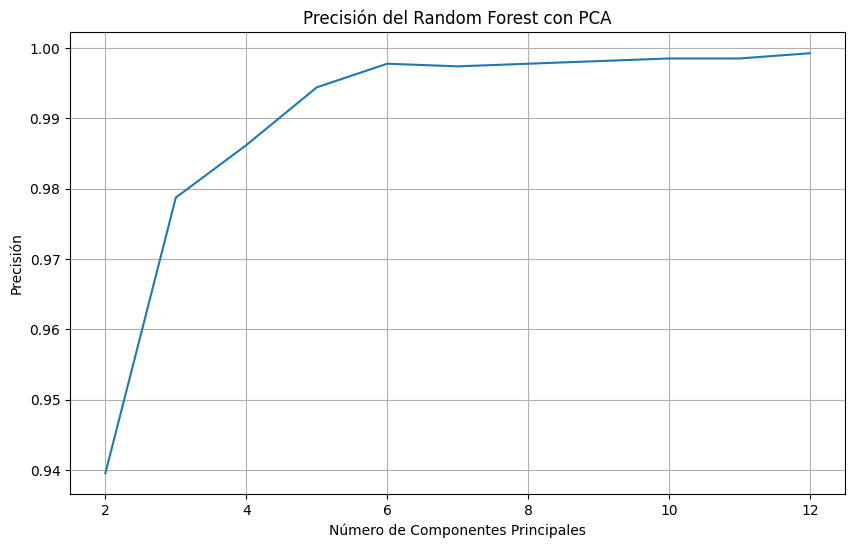

In [155]:
n_features = range(2,13) # definir un rango de valores a probar
scores = []

for n in n_features:

    # Hacer PCA sobre X_train
    # 1. Definir PCA
    pca = PCA(n_components=n)
    # 2. Aprender PCA sobre X_train
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    # Entrenar Random Forest
    # 1. Definir el RF
    random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
    # 2. Entrenar clasificador
    random_forest.fit(X_train_pca, y_train)
    y_pred = random_forest.predict(X_test_pca)
    # Guardar el score
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(n_features), y=scores)
plt.title('Precisión del Random Forest con PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Precisión')
plt.grid()
plt.show()

Vale, estamos viendo que a partir de unas 10 features ya tenemos el score que queríamos y además hemos reducido las variables a un 10% de las que teníamos, incluso menos que las variables originales.

## Clustering

Viendo que el conjunto de datos es sencillito, podemos intentar hacer algo de clustering a ver qué información podemos obtener.

El primer paso va a ser importar la función de Kmeans de sklearn, y a partir de ahi, vamos a buscar el valor óptimo de clusters. Como hemos visto anteriormente, este valor lo obtenemos, por ejemplo, del codo de la gráfica que representa el total de las distancias de los puntos a los centros de los clusters asociados. Os dejo la página de la documentación de sklearn para que lo busquéis:

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

Con esto solo hay que ahora generar los modelos de kmeans, evaluar y pintar la gráfica para los valores de ``k`` que establezcais.




[62275.143278131814]
[62275.143278131814, 56878.68097932002]
[62275.143278131814, 56878.68097932002, 48844.25101062047]
[62275.143278131814, 56878.68097932002, 48844.25101062047, 45576.09463471257]
[62275.143278131814, 56878.68097932002, 48844.25101062047, 45576.09463471257, 43019.7832063141]
[62275.143278131814, 56878.68097932002, 48844.25101062047, 45576.09463471257, 43019.7832063141, 40881.38320631415]
[62275.143278131814, 56878.68097932002, 48844.25101062047, 45576.09463471257, 43019.7832063141, 40881.38320631415, 40946.353646561096]
[62275.143278131814, 56878.68097932002, 48844.25101062047, 45576.09463471257, 43019.7832063141, 40881.38320631415, 40946.353646561096, 39753.523163557795]
[62275.143278131814, 56878.68097932002, 48844.25101062047, 45576.09463471257, 43019.7832063141, 40881.38320631415, 40946.353646561096, 39753.523163557795, 38639.89259354402]
[62275.143278131814, 56878.68097932002, 48844.25101062047, 45576.09463471257, 43019.7832063141, 40881.38320631415, 40946.353646

<Axes: >

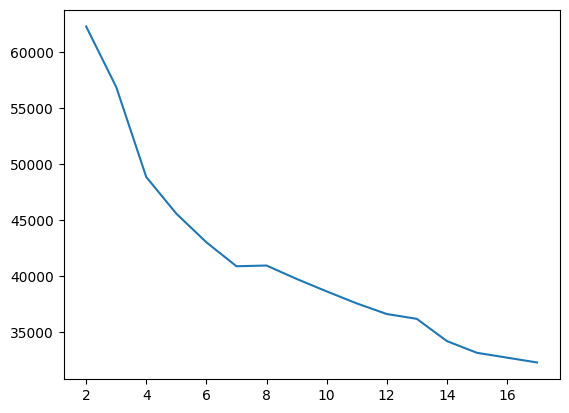

In [156]:
from sklearn.cluster import KMeans

scores = []
k_values = range(2,18)# definir un rango
for a in k_values:


    # Definir Kmeans y ajustar
    kmeans = KMeans(n_clusters=a, random_state=42)
    kmeans.fit(X_encoded)
    # Guardar la predicción
    scores.append(kmeans.inertia_)
    print(scores)
    
# Graficar los resultados    
sns.lineplot(x=k_values, y=scores)

Con el valor que hayáis obtenido de la gráfica, podéis obtener una buena aproximación de Kmeans y con ello podemos pasar a explorar cómo de bien han separado la información los distintos clusters. Para ello, se va a hacer un ``catplot``, seaborn os lo hará solito. Con esto lo que se pretende ver es la distribución de la varaible a predecir en función del cluster que haya determinado Kmeans.

[1 3 1 ... 3 4 0]
   Cluster  Actual
0        1       0
1        3       1
2        1       1
3        0       0
4        4       1


C:\Users\lisyj\AppData\Local\Temp\ipykernel_6716\2254075053.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.catplot(col='Cluster', x='Actual', data=clusters, kind='count',col_wrap=4, palette=palette)
C:\Users\lisyj\AppData\Local\Temp\ipykernel_6716\2254075053.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  ax = sns.catplot(col='Cluster', x='Actual', data=clusters, kind='count',col_wrap=4, palette=palette)


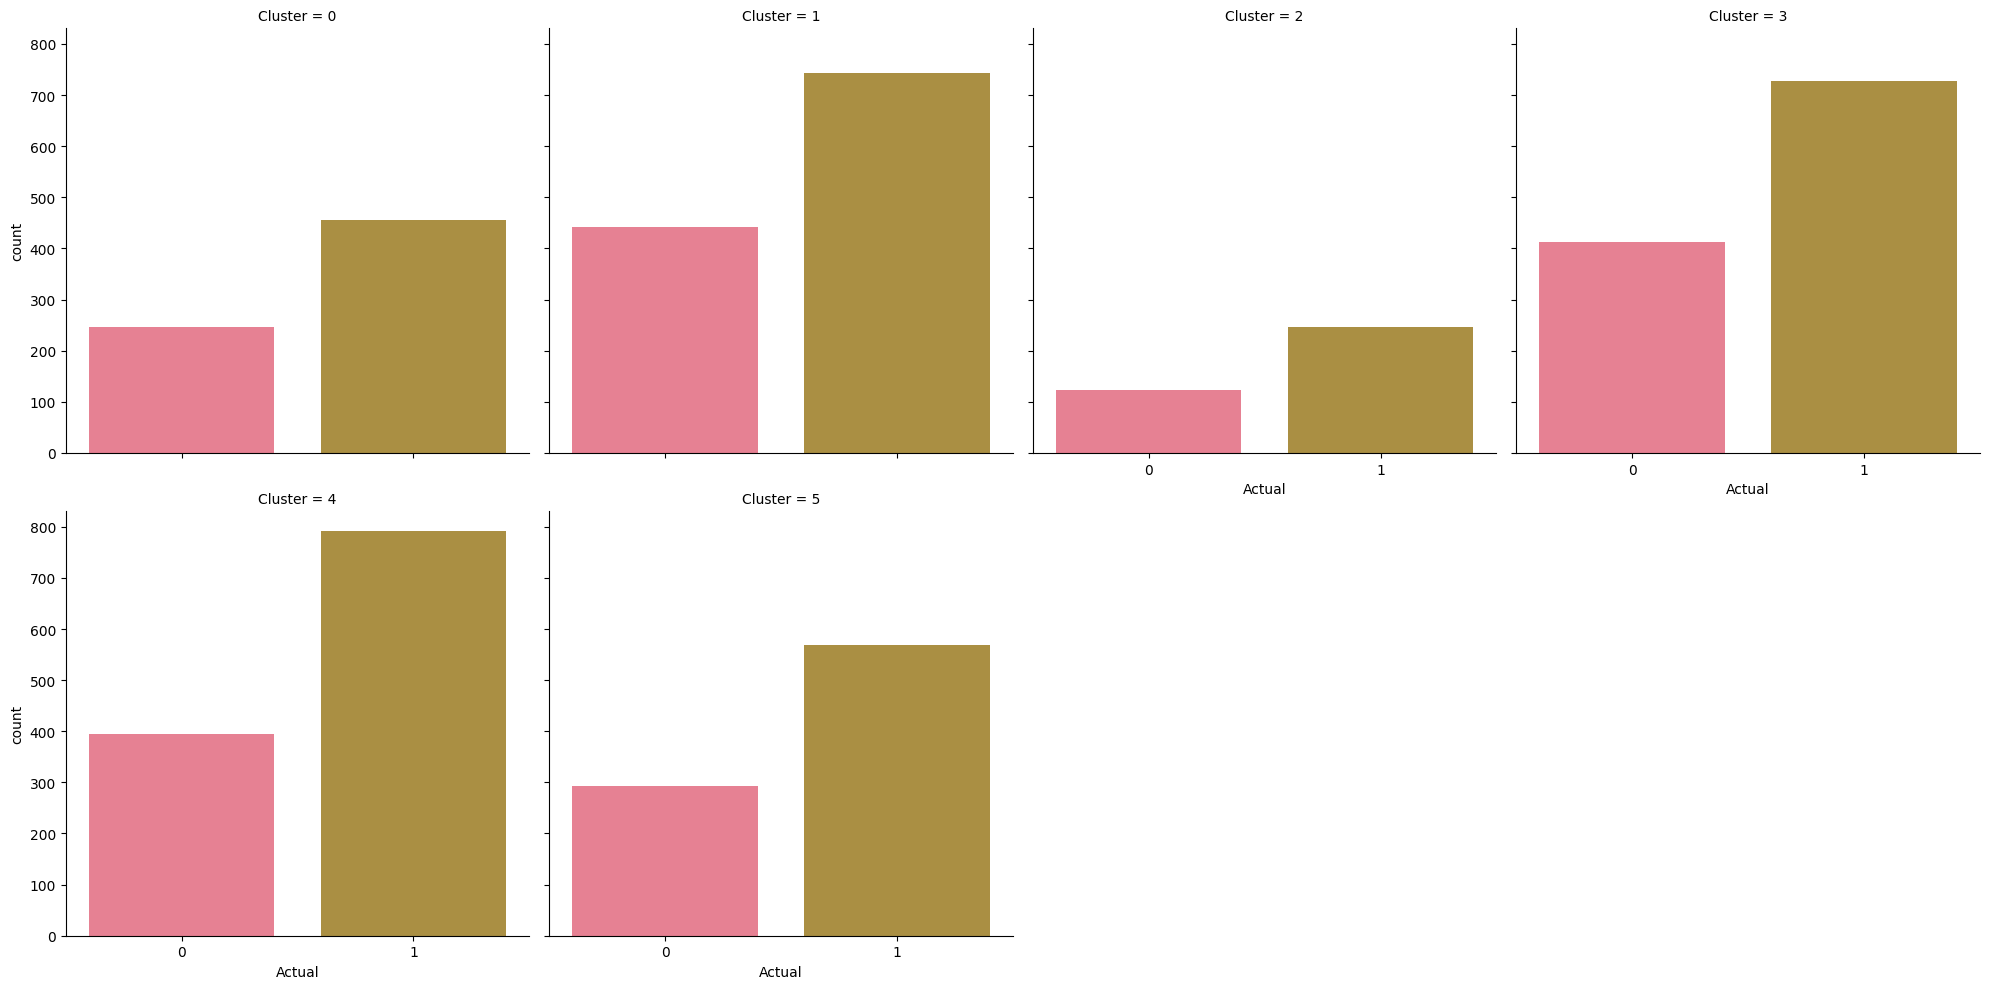

In [157]:
# Aprender Kmeans con el valor de K obtenido.
# Definir y entrenar Kmeans.
K= 6
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X_train)
# Obtener las etiquetas de los clústeres
labels = kmeans.labels_
print(labels) #clúster asignado por K-means para cada punto
# Preparar el catplot.x
clusters = pd.DataFrame()
clusters['Cluster'] = labels
clusters['Actual'] = y
print(clusters.head())
# Pintar.
palette = sns.color_palette("husl", K) 
ax = sns.catplot(col='Cluster', x='Actual', data=clusters, kind='count',col_wrap=4, palette=palette)

Vamos a ver qué tal queda esto pintado. Para ello, repetimos el scatterplot de antes pero usando como color el cluster asignado por kmeans.

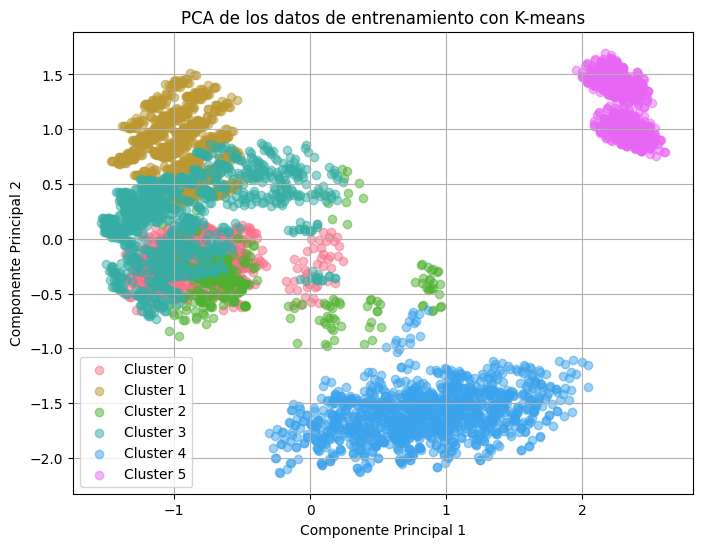

In [162]:
# Entrenar PCA para representar.

pca = PCA(n_components=2)
colorear = pca.fit_transform(X_train)
# Representar en un scatterplot y poner en color las etiquetas de entrenamiento
plt.figure(figsize=(8, 6))
# Usar un color por cada cluster.
K = 6
palette = sns.color_palette("husl", K)
#Gràfico
for cluster in range(K):
    plt.scatter(X_pca[clusters['Cluster'] == cluster, 0], 
                X_pca[clusters['Cluster'] == cluster, 1],
                label=f'Cluster {cluster}', color=palette[cluster], alpha=0.5)


plt.title('PCA de los datos de entrenamiento con K-means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid()
plt.show()



¿Es bastante parecido no? No es tan bueno como el Random Forest, pero ha conseguido identificar bastante bien los distintos puntos del dataset sin utilizar las etiquetas. De hecho, el diagrama de factor que hemos visto antes muestra que solo un par de clusters son imprecisos. Si no hubieramos tenido etiquetas esta aproximacion nos hubiera ayudado mucho a clasificar los distintos tipos de hongos.